In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy.stats as s
import seaborn as sns

In [101]:
da=pd.read_csv('house_sales_train.csv')

In [102]:
da.shape

(1460, 81)

In [103]:
da.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
da.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [105]:
da.dtypes.head(40)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
dtype: object

In [106]:
da.dtypes.tail(41)

HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object


In [107]:
da['Id']=da['Id'].astype(object)
da['MSSubClass']=da['MSSubClass'].astype(object)
da['OverallQual']=da['OverallQual'].astype(object)
da['OverallCond']=da['OverallCond'].astype(object)


In [108]:
da.dtypes.head(40)

Id               object
MSSubClass       object
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      object
OverallCond      object
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
dtype: object

In [109]:
da.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
da.describe(include=['integer', 'float'])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [111]:
da.describe(include=['object'])

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,91,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,1460,15,5,2,2,4,4,2,5,3,...,6,3,5,5,3,3,4,4,9,6
top,1,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1,536,1151,1454,50,925,1311,1459,1052,1382,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [112]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [113]:
da.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [114]:
da.isnull().sum().tail(41)

HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [115]:
da.dropna(axis=1, thresh=0.70*len(da),inplace=True)

In [116]:
da.shape

(1460, 76)

In [117]:
da.isnull().sum().head(40)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
dtype: int64

In [118]:
da['BsmtQual'] = da['BsmtQual'].replace(['NA'],['NO'])

In [119]:
da['BsmtCond'] = da['BsmtCond'].replace(['NA'],['NO'])

In [120]:
da['BsmtExposure'] = da['BsmtExposure'].replace(['NA'],['NO'])

In [121]:
da['BsmtFinType1'] = da['BsmtFinType1'].replace(['NA'],['NO'])

In [122]:
da['BsmtFinType2'] = da['BsmtFinType2'].replace(['NA'],['NO'])

In [123]:
da['GarageType'] = da['GarageType'].replace(['NA'],['NO'])

In [124]:
da['GarageFinish'] = da['GarageFinish'].replace(['NA'],['NO'])

In [125]:
da['GarageQual'] = da['GarageQual'].replace(['NA'],['NO'])

In [126]:
da['GarageCond'] = da['GarageCond'].replace(['NA'],['NO'])

In [127]:
da.isnull().sum().head(40)


Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
dtype: int64

In [128]:
da.dropna(how='any', inplace=True)

In [129]:
da.shape

(1094, 76)

In [130]:
da.reset_index(drop=True, inplace=True)

<AxesSubplot:>

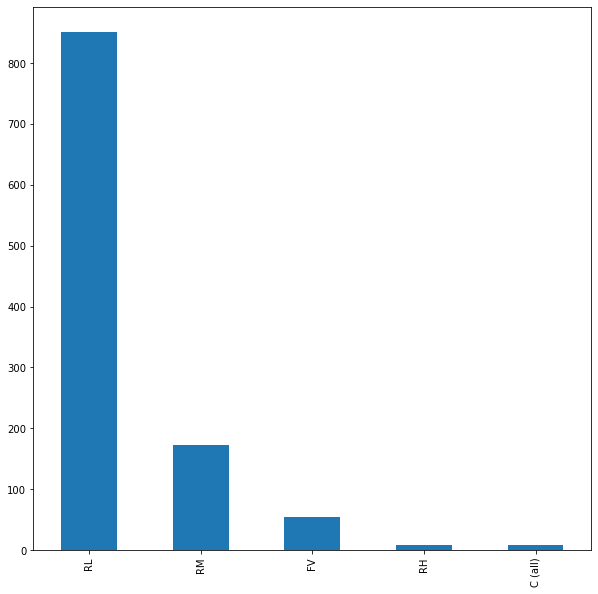

In [131]:
da['MSZoning'].value_counts().plot(kind='bar', figsize=(10,10))

<AxesSubplot:>

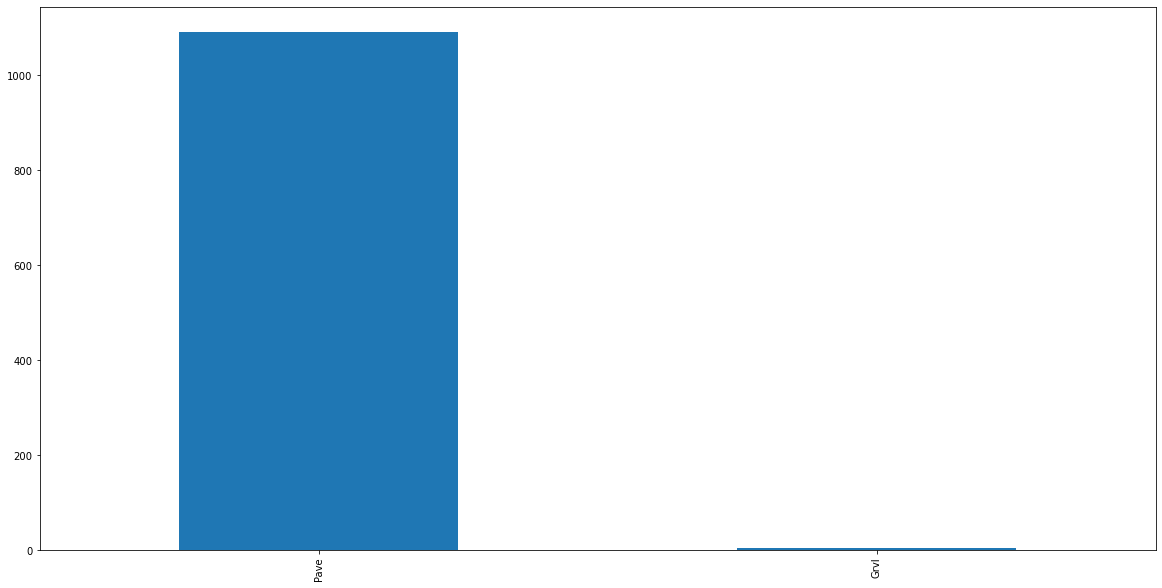

In [132]:
da['Street'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

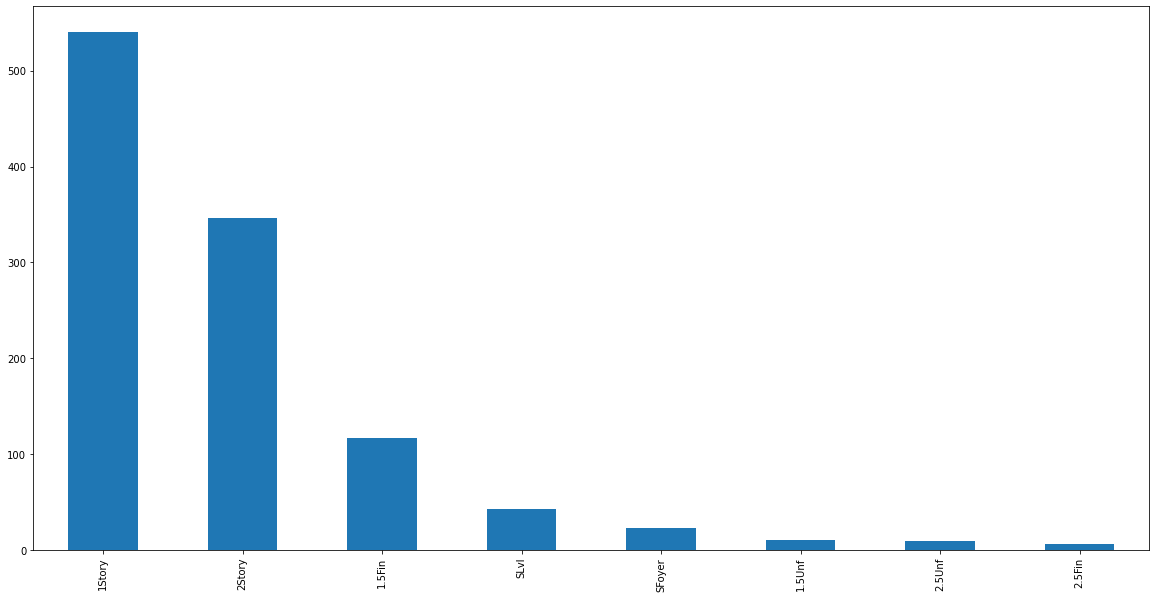

In [133]:
da['HouseStyle'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

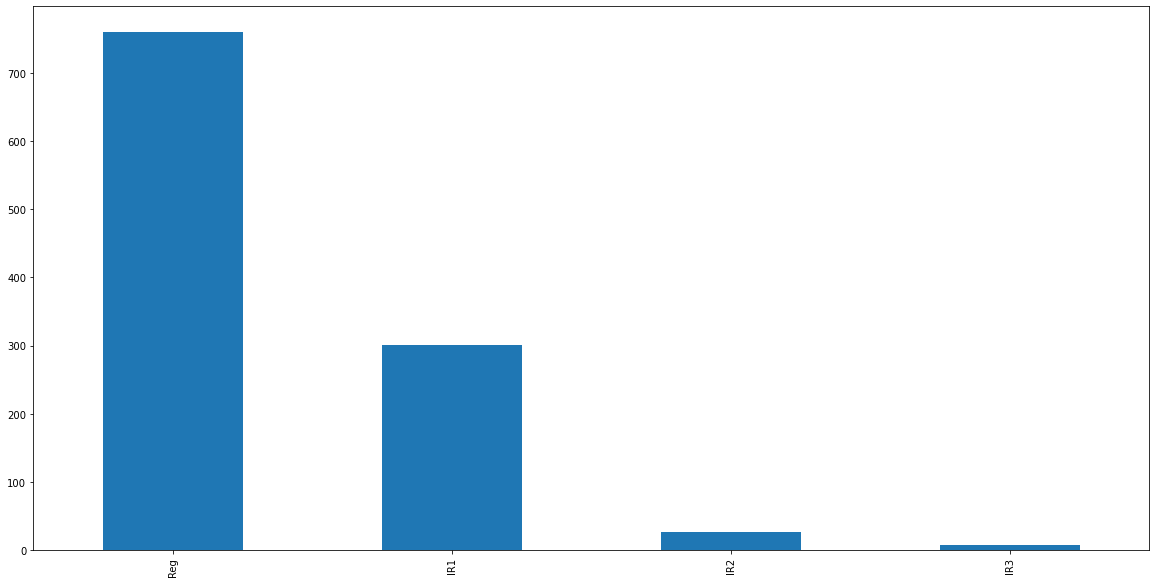

In [134]:
da['LotShape'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

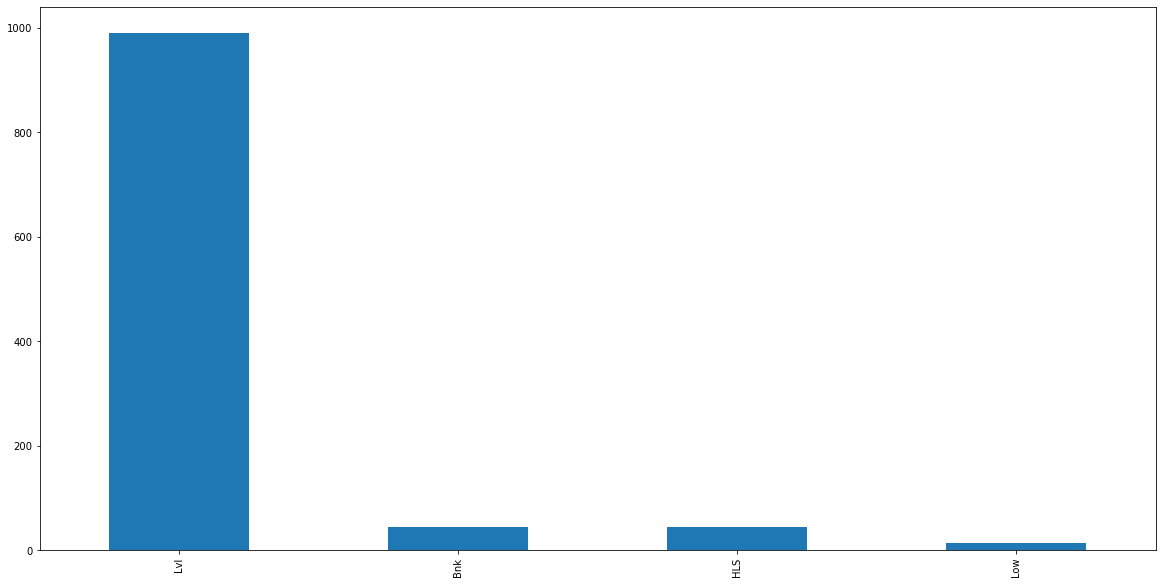

In [135]:
da['LandContour'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

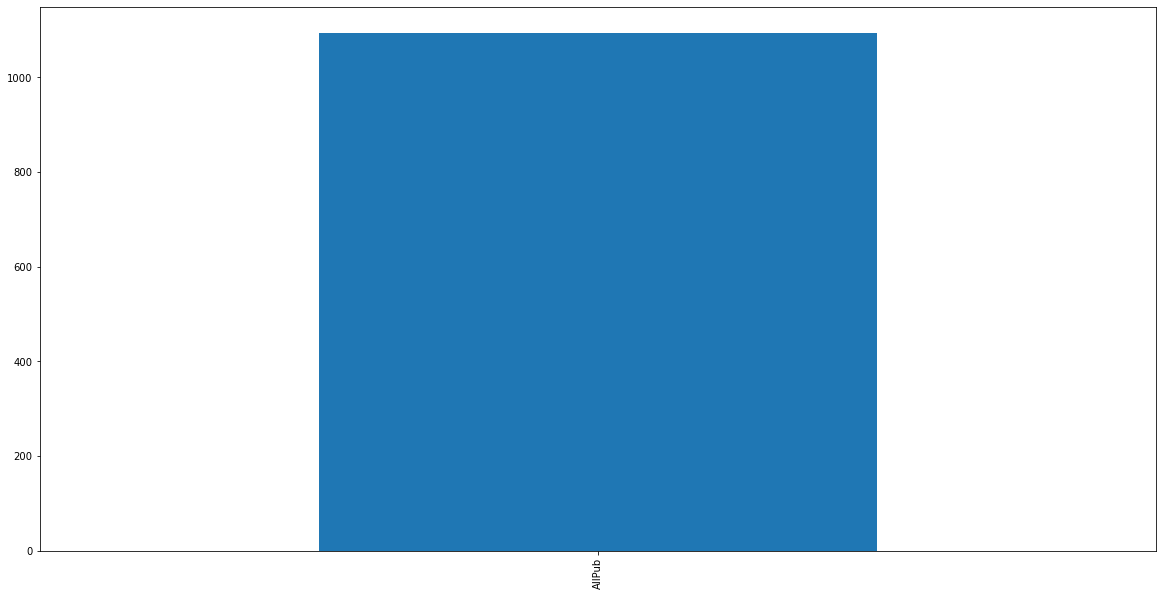

In [136]:
da['Utilities'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

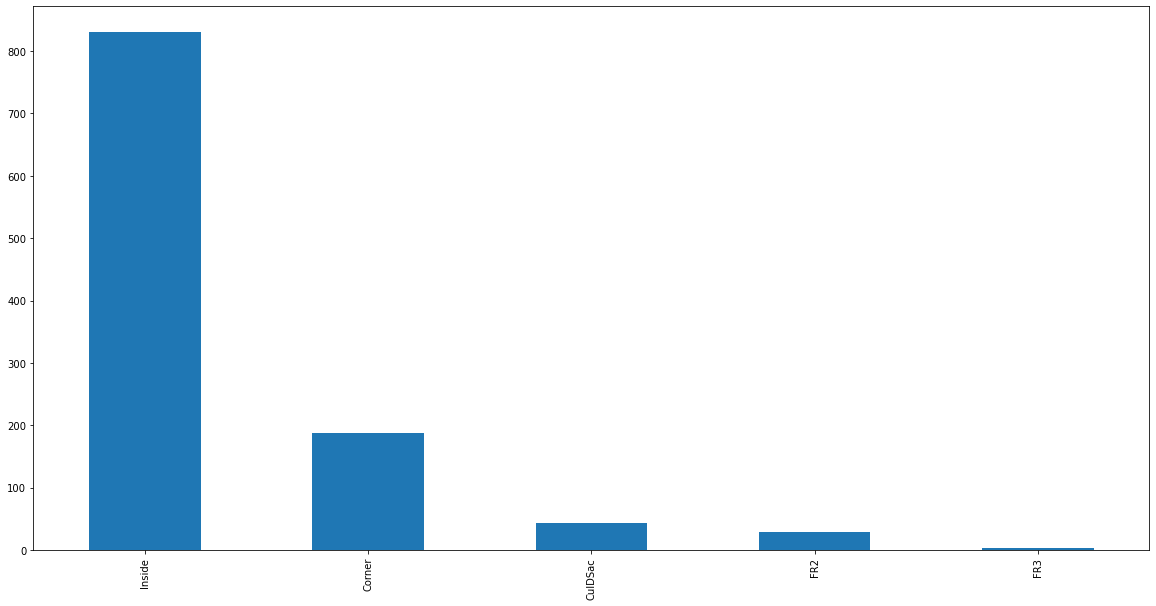

In [137]:
da['LotConfig'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

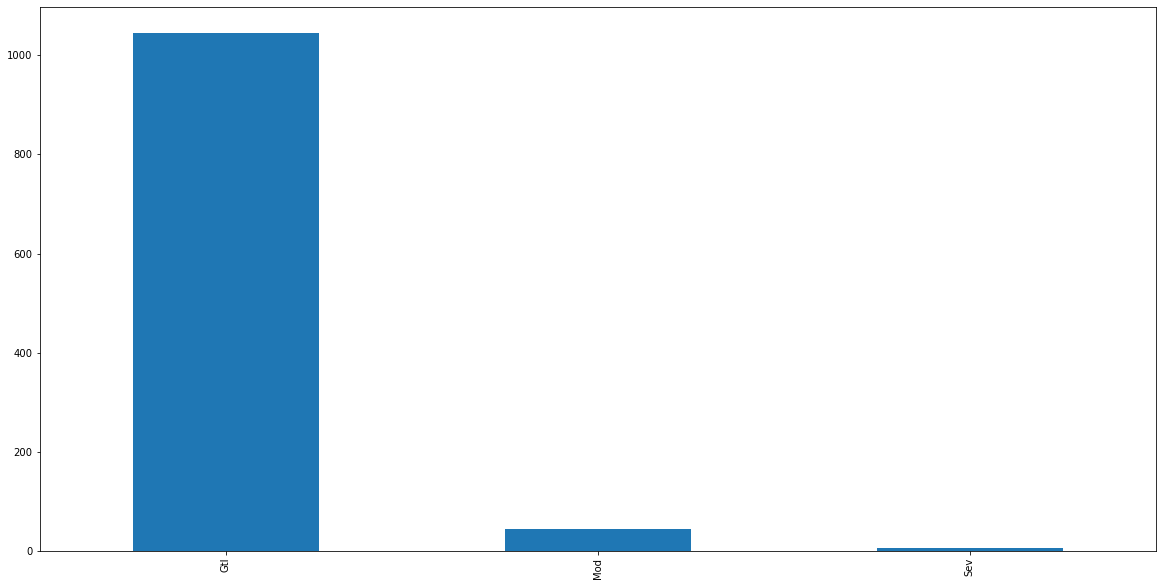

In [138]:
da['LandSlope'].value_counts().plot(kind='bar', figsize=(20,10))

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

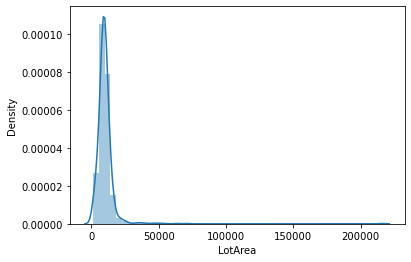

In [139]:
sns.distplot(da['LotArea'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

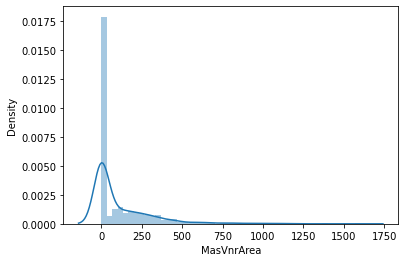

In [140]:
sns.distplot(da['MasVnrArea'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

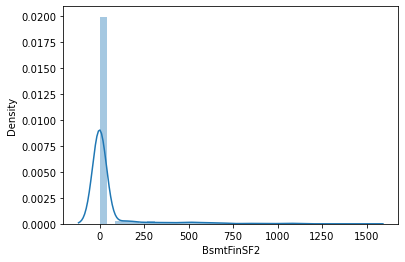

In [141]:
sns.distplot(da['BsmtFinSF2'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

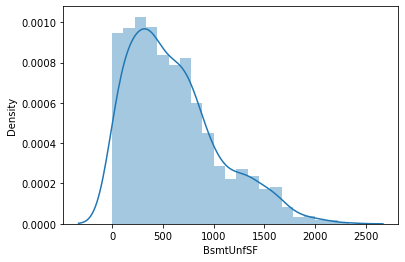

In [142]:
sns.distplot(da['BsmtUnfSF'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

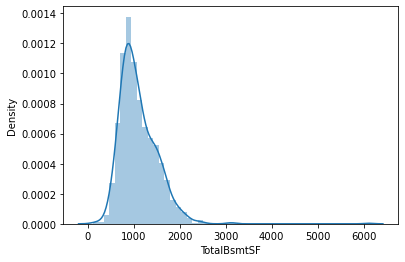

In [143]:
sns.distplot(da['TotalBsmtSF'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

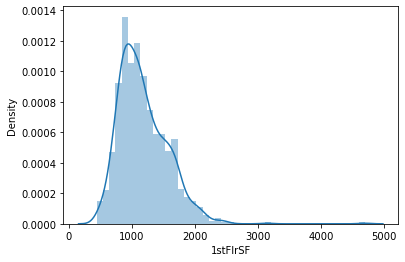

In [144]:
sns.distplot(da['1stFlrSF'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2ndFlrSF', ylabel='Density'>

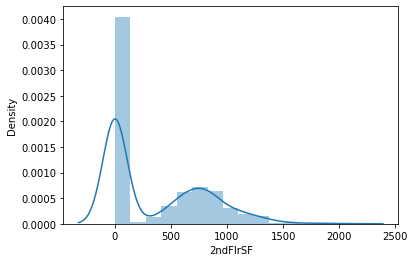

In [145]:
sns.distplot(da['2ndFlrSF'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

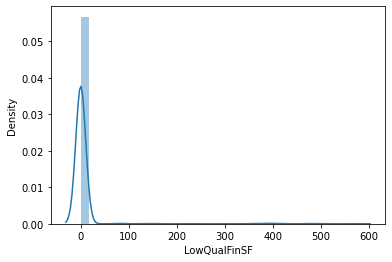

In [146]:
sns.distplot(da['LowQualFinSF'])

C:\Users\saad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

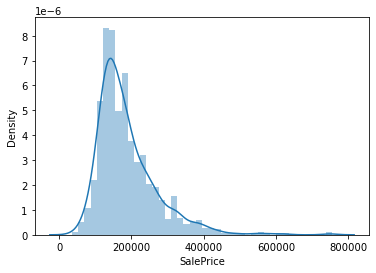

In [147]:
sns.distplot(da['SalePrice'])

In [148]:
data1=da.copy()

In [149]:
ordinal_list=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual' , 'GarageQual','GarageCond' ]

In [150]:
da['ExterQual'] = da['ExterQual'].replace(['Ex','Gd','TA','Fa', 'Po'],[1,2,3,4,5])

In [151]:
da['ExterCond'] = da['ExterCond'].replace(['Ex','Gd','TA','Fa', 'Po'],[1,2,3,4,5])

In [152]:
da['HeatingQC'] = da['HeatingQC'].replace(['Ex','Gd','TA','Fa', 'Po'],[1,2,3,4,5])

In [153]:
da['KitchenQual'] = da['KitchenQual'].replace(['Ex','Gd','TA','Fa', 'Po'],[1,2,3,4,5])

In [154]:
da['BsmtQual'] = da['BsmtQual'].replace(['Ex','Gd','TA','Fa', 'Po','NO'],[1,2,3,4,5,6])

In [155]:
da['BsmtCond'] = da['BsmtCond'].replace(['Ex','Gd','TA','Fa', 'Po','NO'],[1,2,3,4,5,6])

In [156]:
da['GarageQual'] = da['GarageQual'].replace(['Ex','Gd','TA','Fa', 'Po','NO'],[1,2,3,4,5,6])

In [157]:
da['GarageCond'] = da['GarageCond'].replace(['Ex','Gd','TA','Fa', 'Po','NO'],[1,2,3,4,5,6])

In [158]:
list(pd.cut(da.SalePrice,bins=4).unique())

[Interval(34591.311, 215233.25, closed='right'),
 Interval(215233.25, 395155.5, closed='right'),
 Interval(395155.5, 575077.75, closed='right'),
 Interval(575077.75, 755000.0, closed='right')]

In [159]:
da['SalePrice']=pd.cut(da.SalePrice,bins=4,labels=[0,1,2,3])

In [160]:
da.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,1


In [161]:
ordinal_list=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual' , 'GarageQual','GarageCond','SalePrice' ]

In [162]:
da.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,1
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,1
7,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,0
8,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,0
9,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,0


In [163]:
nominal_list = []
for i in da.columns.tolist():
     if (da[i].dtype=='object') and (i not in ordinal_list):
        nominal_list.append(i)
print (nominal_list) 
print('Number of nominal features:', str(len(nominal_list)))

['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
Number of nominal features: 34


In [164]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in nominal_list:
    da[column]=encoder.fit_transform(da[column])

In [165]:
ordinal_data=da[ordinal_list]
nominal_data=da[nominal_list]
categorical_data = pd.concat([ordinal_data,nominal_data], axis=1)

In [166]:
categorical_data

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,Id,...,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,2,3,2,3,1,2,3,3,0,0,...,5,0,1,4,5,1,1,2,8,4
1,3,3,2,3,1,3,3,3,0,1,...,5,0,1,4,5,1,1,2,8,4
2,2,3,2,3,1,2,3,3,1,2,...,5,0,1,4,5,1,1,2,8,4
3,3,3,3,2,2,2,3,3,0,3,...,5,0,1,4,5,5,2,2,8,0
4,2,3,2,3,1,2,3,3,1,4,...,5,0,1,4,5,1,1,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,3,3,2,3,1,3,3,3,0,1089,...,5,0,1,4,5,1,1,2,8,4
1090,3,3,2,3,3,3,3,3,0,1090,...,4,0,1,4,2,1,2,2,8,4
1091,1,2,3,2,1,2,3,3,1,1091,...,5,0,1,4,5,1,1,2,8,4
1092,3,3,3,3,2,2,3,3,0,1092,...,4,0,1,0,5,1,2,2,8,4


In [167]:
X=categorical_data.drop('SalePrice',axis=1)
Y=categorical_data['SalePrice']
chi_scores = chi2(X,Y)

In [168]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
chi2_values=pd.Series(chi_scores[0],index = X.columns)
chi2_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

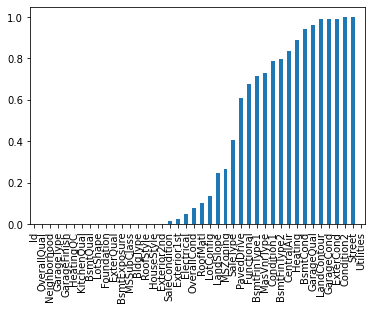

In [169]:
 p_values.plot.bar()

<AxesSubplot:>

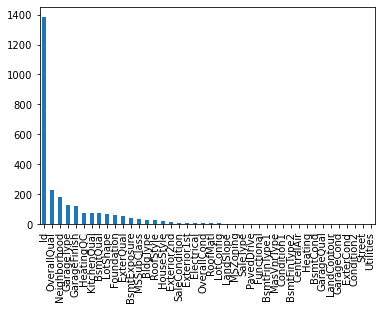

In [170]:
 chi2_values.plot.bar()

In [183]:
# Three features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 3) 
X_kbest_features = chi2_features.fit_transform(X, Y)
print('Original feature number:', X.shape)  
print('Reduced feature number:',X_kbest_features.shape)

Original feature number: (1094, 42)
Reduced feature number: (1094, 3)


In [190]:
index = chi2_features.get_support(indices=True)
print(index)
col[index]

[ 8 17 22]


NameError: name 'col' is not defined

In [189]:
da.iloc[:,22]

0       11
1        7
2       11
3       12
4       11
        ..
1089    11
1090     8
1091     4
1092     7
1093     5
Name: Exterior1st, Length: 1094, dtype: int32

In [187]:
chi2_values

Id               1383.546167
OverallQual       228.155585
Neighborhood      183.535737
GarageType        128.489627
GarageFinish      119.588304
HeatingQC          75.534094
KitchenQual        73.543305
BsmtQual           72.311337
LotShape           67.969345
Foundation         58.417000
ExterQual          56.205813
BsmtExposure       43.428761
MSSubClass         33.777661
BldgType           28.288153
RoofStyle          27.871205
HouseStyle         18.384653
Exterior2nd        13.933738
SaleCondition      10.658784
Exterior1st         9.170586
Electrical          7.953093
OverallCond         6.746437
RoofMatl            6.171400
LotConfig           5.536417
LandSlope           4.151490
MSZoning            3.964632
SaleType            2.914470
PavedDrive          1.832081
Functional          1.515216
BsmtFinType1        1.352403
MasVnrType          1.301677
Condition1          1.047573
BsmtFinType2        1.007863
CentralAir          0.862613
Heating             0.640842
BsmtCond      

In [188]:
p_values

Id               1.095261e-299
OverallQual       3.464105e-49
Neighborhood      1.520088e-39
GarageType        1.144320e-27
GarageFinish      9.464576e-26
HeatingQC         2.783756e-16
KitchenQual       7.434900e-16
BsmtQual          1.365280e-15
LotShape          1.161435e-14
Foundation        1.280476e-12
ExterQual         3.796853e-12
BsmtExposure      1.995579e-09
MSSubClass        2.207287e-07
BldgType          3.159792e-06
RoofStyle         3.865286e-06
HouseStyle        3.663807e-04
Exterior2nd       2.996748e-03
SaleCondition     1.372157e-02
Exterior1st       2.710676e-02
Electrical        4.699115e-02
OverallCond       8.043420e-02
RoofMatl          1.035626e-01
LotConfig         1.364766e-01
LandSlope         2.455638e-01
MSZoning          2.653087e-01
SaleType          4.050011e-01
PavedDrive        6.079788e-01
Functional        6.787630e-01
BsmtFinType1      7.167287e-01
MasVnrType        7.287349e-01
Condition1        7.897427e-01
BsmtFinType2      7.993493e-01
CentralA

In [74]:
df=da.copy()

In [76]:
cor_matrix=da.corr()

In [81]:
 print(cor_matrix['SalePrice'].sort_values(ascending=False).head(50))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
RoofMatl         0.132383
Functional       0.115328
ScreenPorch      0.111447
Exterior2nd      0.103766
Exterior1st      0.103551
PoolArea         0.092404
Condition1  

In [82]:
cor_matrix

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.018745,-0.006096,-0.010601,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.018745,1.000000,0.037785,-0.337937,-0.132505,-0.025737,0.090920,-0.007658,-0.026217,0.060625,...,-0.005194,-0.044435,-0.017886,0.020837,-0.006062,0.007052,-0.022100,0.020195,-0.033097,-0.054751
MSZoning,-0.006096,0.037785,1.000000,-0.111690,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.337937,-0.111690,1.000000,0.426095,-0.040886,-0.169641,-0.080757,NaN,-0.208276,...,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.132505,-0.034452,0.426095,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,0.007052,-0.031496,0.011200,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.022100,-0.020628,0.007450,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.020195,0.097437,-0.034559,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.033097,0.009494,0.063372,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [352]:
features=cor_matrix.loc[cor_matrix['SalePrice']>0.60,['SalePrice']]

In [353]:
features

,SalePrice
OverallQual,0.790982
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
SalePrice,1.000000
